<a href="https://colab.research.google.com/github/AlaricAI/Portfolio/blob/main/1.Diagnosing%20diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""

# Diabet bashorat qilish loyihasi

Ushbu loyihada Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan ma'lumotlar to'plamidan foydalangan holda, diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini bashorat qilish vazifasi bajarilgan.

## 1. Ma'lumotlarni yuklab olish va tayyorlash

Dastlab, zarur kutubxonalar import qilinadi va ma'lumotlar to'plami yuklab olinadi.
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score


In [2]:
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/raw/main/diabetes.csv')

"""Ma'lumotlar to'plami haqida umumiy ma'lumot olish uchun `info()` va `head()` metodlari qo'llaniladi."""

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
"""Ma'lumotlarning `Outcome` ustuni bilan korrelyatsiyasi aniqlanadi."""

df.corrwith(df['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [4]:
"""
Yangi xususiyatlar yaratish:

Bir nechta yangi xususiyatlar yaratish orqali modelning aniqligini oshirishga harakat qilamiz.
"""

df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Glucose_Age'] = df['Glucose'] * df['Age']
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_BMI_interaction'] = df['Glucose'] * df['BMI'] * np.log(df['Age'] + 1)
df['Glucose_squared'] = df['Glucose'] ** 2
df['BMI_squared'] = df['BMI'] ** 2
df['Glucose_Age_squared'] = df['Glucose'] * df['Age'] ** 2
df['Log_Glucose'] = np.log(df['Glucose'] + 1)
df['Log_Age'] = np.log(df['Age'] + 1)
df['Age_BloodPressure'] = df['Age'] * df['BloodPressure']

In [5]:
"""Yangi xususiyatlar bilan korrelyatsiya qayta tekshiriladi."""

df.corrwith(df['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Glucose_BMI                 0.490262
Glucose_Age                 0.401283
BMI_Age                     0.357727
Glucose_BMI_interaction     0.516622
Glucose_squared             0.483739
BMI_squared                 0.297109
Glucose_Age_squared         0.289279
Log_Glucose                 0.253576
Log_Age                     0.274247
Age_BloodPressure           0.206198
dtype: float64

In [6]:
"""
Ma'lumotlarni standartlash:

`StandardScaler` yordamida 'Glucose', 'BMI' va 'Age' ustunlari standartlashtiriladi.
"""

scaler = StandardScaler()
df[['Glucose', 'BMI', 'Age']] = scaler.fit_transform(df[['Glucose', 'BMI', 'Age']])

In [7]:
"""
PCA (Principal Component Analysis):

PCA yordamida 'Glucose', 'BMI' va 'Age' ustunlaridan yangi xususiyat yaratiladi.
"""

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Glucose', 'BMI', 'Age']])
df['PCA_1'] = df_pca[:, 0]

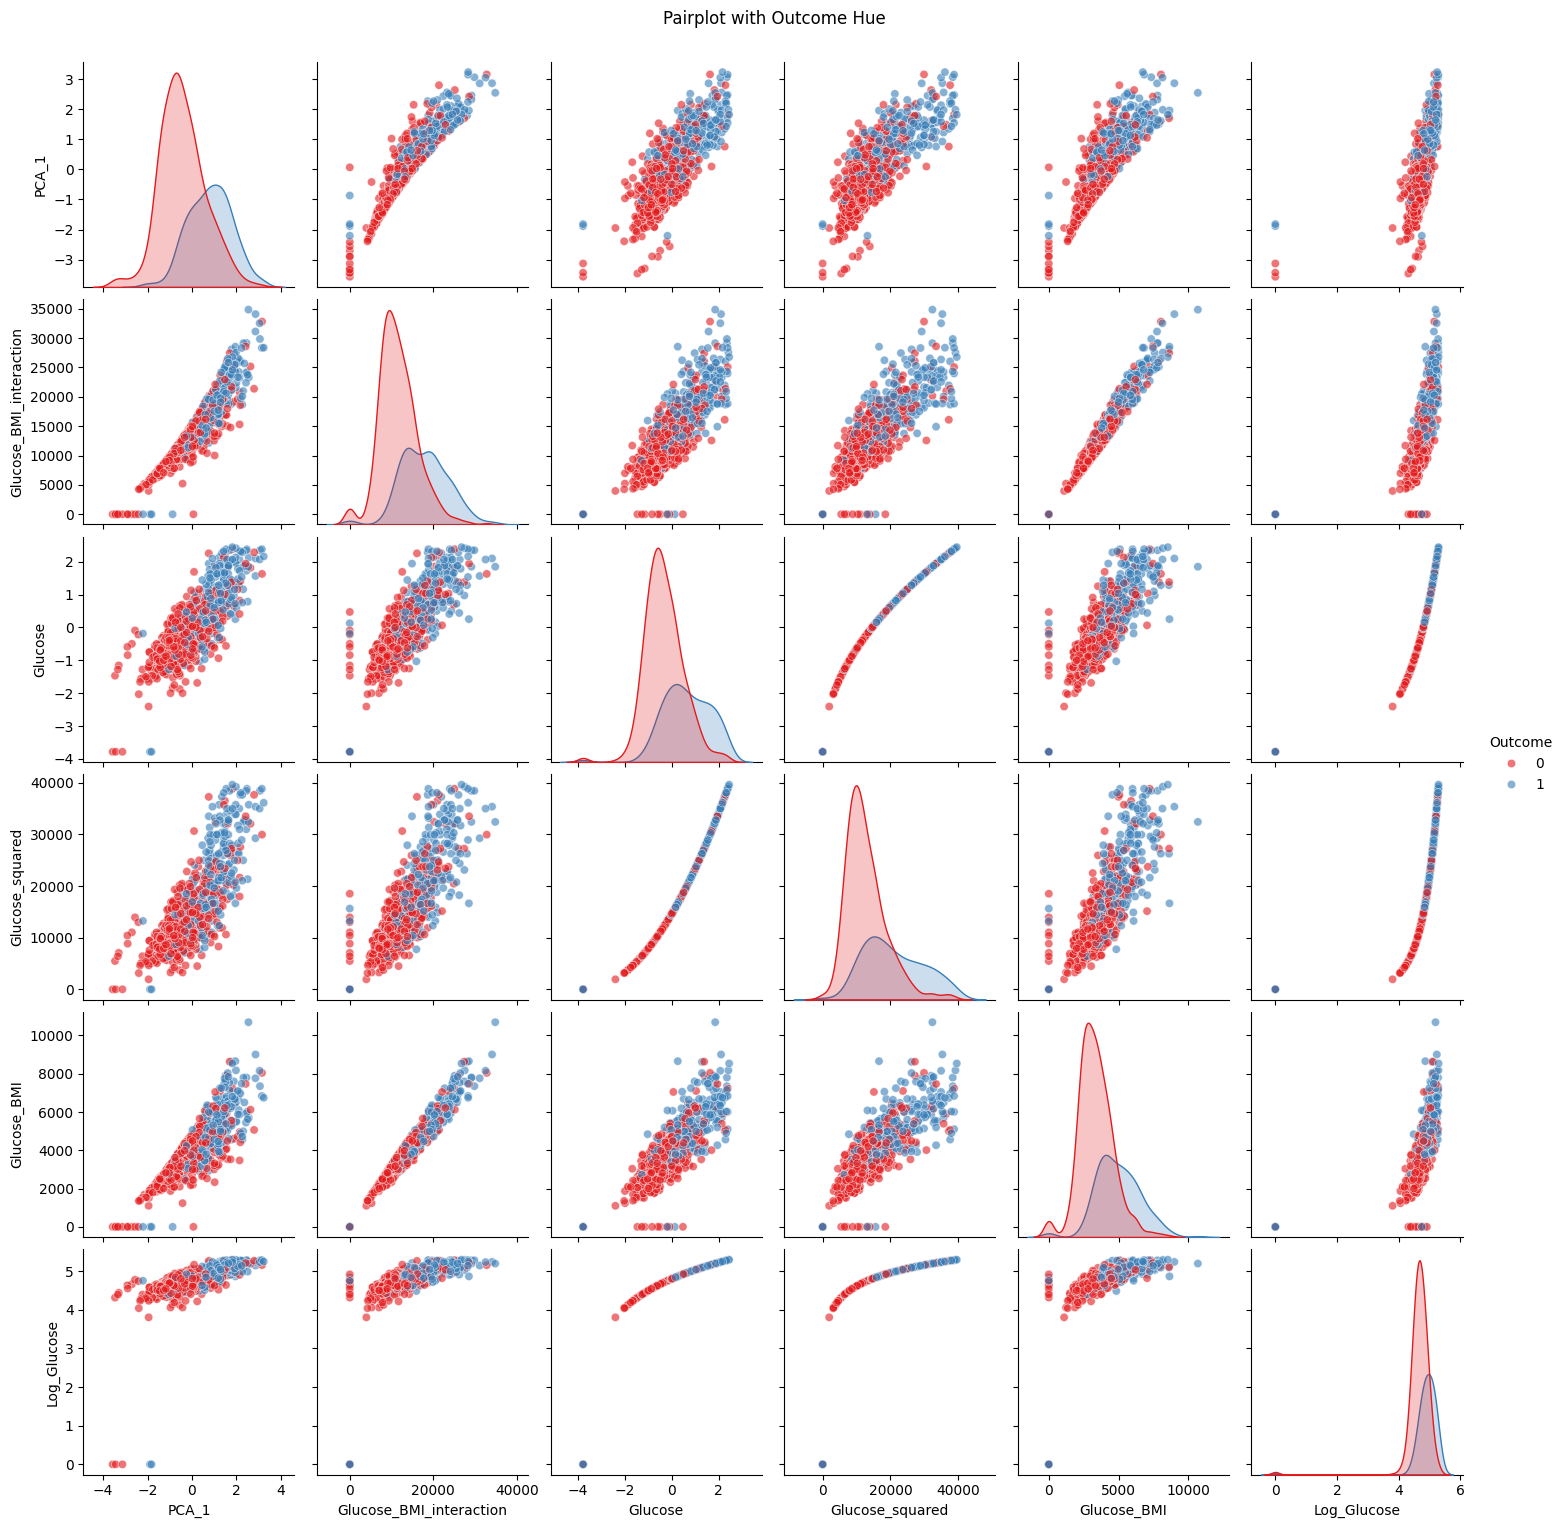

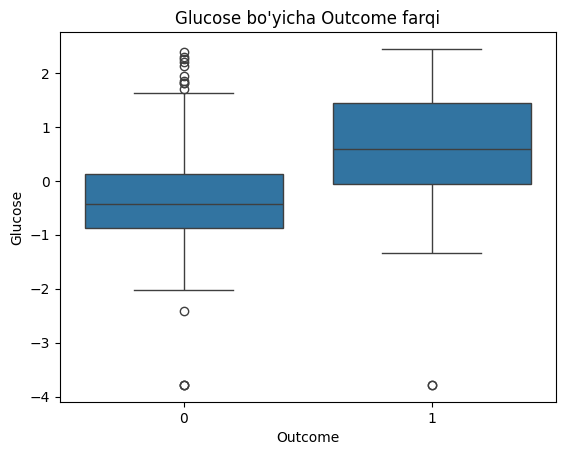

In [8]:
"""
Ma'lumotlarni vizualizatsiya qilish:

`pairplot` yordamida ma'lumotlarning tarqalishi vizualizatsiya qilinadi.
`boxplot` yordamida 'Glucose' va 'Outcome' o'rtasidagi bog'liqlik ko'rsatiladi.
"""

sns.pairplot(
    df[['PCA_1', 'Outcome', 'Glucose_BMI_interaction', 'Glucose', 'Glucose_squared', 'Glucose_BMI', 'Log_Glucose']],
    hue='Outcome',
    diag_kind='kde',
    palette='Set1',
    plot_kws={'alpha': 0.6}
)
plt.suptitle("Pairplot with Outcome Hue", y=1.02)
plt.show()

sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose bo'yicha Outcome farqi")
plt.show()

In [9]:
"""
Etishmayotgan qiymatlarni to'ldirish:

`Log_Glucose` va `Log_Age` ustunlaridagi etishmayotgan qiymatlar o'rtacha qiymat bilan to'ldiriladi.
"""

mean_log_glucose = df['Log_Glucose'].mean()
df['Log_Glucose'].fillna(mean_log_glucose, inplace=True)
mean_log_age = df['Log_Age'].mean()
df['Log_Age'].fillna(mean_log_age, inplace=True)
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Glucose_BMI                 0
Glucose_Age                 0
BMI_Age                     0
Glucose_BMI_interaction     0
Glucose_squared             0
BMI_squared                 0
Glucose_Age_squared         0
Log_Glucose                 0
Log_Age                     0
Age_BloodPressure           0
PCA_1                       0
dtype: int64


<ipython-input-9-f472c16b2ebf>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Glucose'].fillna(mean_log_glucose, inplace=True)
<ipython-input-9-f472c16b2ebf>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [10]:
"""## 2. Modelni o'rgatish

Ma'lumotlarni o'qitish va test to'plamlariga ajratish.
"""

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
"""Ma'lumotlarni standartlashtirish."""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest aniqligi: 0.7597402597402597


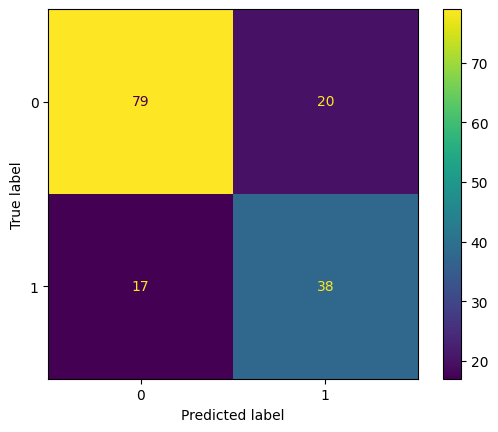

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

ROC AUC: 0.81267217630854
                     Feature  Importance
11   Glucose_BMI_interaction    0.108615
18                     PCA_1    0.092398
9                Glucose_Age    0.086952
8                Glucose_BMI    0.080834
6   DiabetesPedigreeFunction    0.056247
10                   BMI_Age    0.055997
15               Log_Glucose    0.054767
14       Glucose_Age_squared    0.054165
1                    Glucose    0.052593
12           Glucose_squared    0.050626
17         Age_BloodPressure    0.041765
13               BMI_squared    0.040673
5                        BMI    0.038337
2              BloodPressure    0.036926
7                        Age    

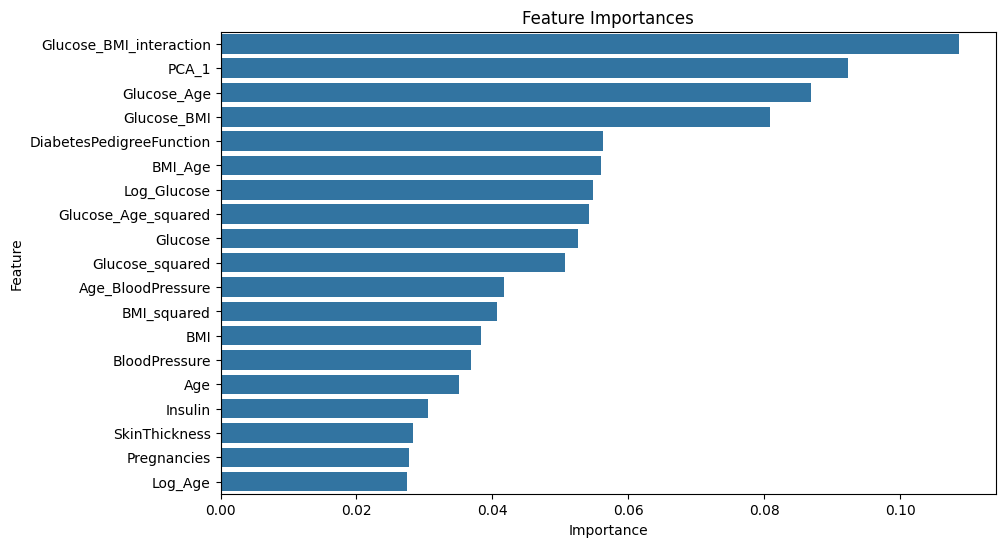

In [18]:
# prompt: endi buni modellashtirish kerak va aniqliginiham ko'rish kerak grafik va raqamlar bilan

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# RandomForestClassifier modelini yaratish
rf_model = RandomForestClassifier(random_state=42)

# Modelni o'qitish
rf_model.fit(X_train, y_train)

# Test to'plamida bashorat qilish
y_pred = rf_model.predict(X_test)

# Aniqlikni hisoblash
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest aniqligi: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc}")

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()
